In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import mplcursors
import descartes

from geopy.geocoders import Nominatim
from shapely.geometry import Point, Polygon

In [3]:
street_map = gpd.read_file('municipios/Municipios.shp')
# street_map = gpd.read_file('joaopessoa/bairros/Bairros.shp')
# street_map = gpd.read_file('joaopessoa/setores/Setores.shp')

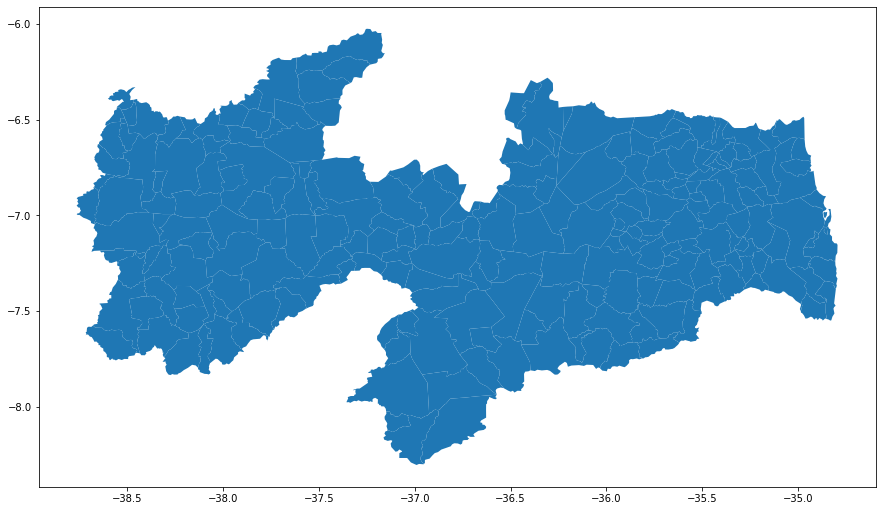

In [4]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax)

In [5]:
df=pd.read_csv('csv/producao.csv',encoding = "ISO-8859-1", sep =';',low_memory=False,
              usecols=['CD_ALUNO','MUNICIPIO_ENDERECO_ALUNO','UF_ENDERECO_ALUNO'])
# print(df.CD_ALUNO.size)
# print(df.drop_duplicates().CD_ALUNO.size)
df = df.drop_duplicates()
df.head()

9446
6463


,CD_ALUNO,MUNICIPIO_ENDERECO_ALUNO,UF_ENDERECO_ALUNO
0,SGEPB00023728,Santa Rita,PB
1,SGEPB00020876,Guarabira,PB
2,SGEPB00024701,Queimadas,PB
3,SGEPB00017424,Bayeux,PB
4,SGEPB00023734,Campina Grande,PB


In [6]:
df_pb = df[df['UF_ENDERECO_ALUNO'] == 'PB']
# print(df_pb.CD_ALUNO.size)
df_pb.head()

6004


,CD_ALUNO,MUNICIPIO_ENDERECO_ALUNO,UF_ENDERECO_ALUNO
0,SGEPB00023728,Santa Rita,PB
1,SGEPB00020876,Guarabira,PB
2,SGEPB00024701,Queimadas,PB
3,SGEPB00017424,Bayeux,PB
4,SGEPB00023734,Campina Grande,PB


In [7]:
# df_jp = df[df['CIDADE'] == 'João Pessoa']
# df_jp.head()

In [8]:
geolocator = Nominatim()
df_locations = pd.DataFrame(columns=['lat','lon'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


In [9]:
lat = []
lon = []
location=None

In [10]:
# for bairro in df_jp['BAIRRO'].drop_duplicates():
for local in df_pb['MUNICIPIO_ENDERECO_ALUNO'].drop_duplicates():
    if type(local) is not str:
        continue

    try:
#         location = geolocator.geocode(bairro+" João Pessoa")
        location = geolocator.geocode(local+" Paraíba")
    except:
        pass
    
    if location is None:
        continue
    lat.append(location.raw['lat'])
    lon.append(location.raw['lon'])

In [11]:
df_locations['lat'] = lat
df_locations['lon'] = lon
df_locations.head()

,lat,lon
0,-6.8513982,-35.4915582
1,-7.3640404,-35.9016644
2,-7.1301631,-34.936532
3,-7.2246743,-35.8771292
4,-7.1215981,-34.882028


In [12]:
df_locations.head()

,lat,lon
0,-6.8513982,-35.4915582
1,-7.3640404,-35.9016644
2,-7.1301631,-34.936532
3,-7.2246743,-35.8771292
4,-7.1215981,-34.882028


In [13]:
df_locations['lat'] = df_locations['lat'].astype(float)
df_locations['lon'] = df_locations['lon'].astype(float)

In [14]:
df_locations = df_locations[(df_locations['lat']>float(ax.get_ylim()[0])) & (df_locations['lat']<float(ax.get_ylim()[1])) & 
           (df_locations['lon']>float(ax.get_xlim()[0])) & (df_locations['lon']<float(ax.get_xlim()[1]))]

In [15]:
geometry = [Point(xy) for xy in zip(df_locations['lon'],df_locations['lat'])]
geometry[:3]

In [16]:
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df_locations, crs = crs, geometry=geometry)
# geo_df = gpd.GeoDataFrame(df_bairros, geometry=geometry)
geo_df.head()

,lat,lon,geometry
0,-6.851398,-35.491558,POINT (-35.4915582 -6.8513982)
1,-7.364040,-35.901664,POINT (-35.9016644 -7.3640404)
2,-7.130163,-34.936532,POINT (-34.936532 -7.1301631)
3,-7.224674,-35.877129,POINT (-35.8771292 -7.2246743)
4,-7.121598,-34.882028,POINT (-34.882028 -7.1215981)


In [17]:
street_map['geometry'].head()

0    POLYGON ((-37.70375999999851 -7.37317999999868...
1    POLYGON ((-38.20503999999892 -7.00980999999774...
2    POLYGON ((-35.53464999999778 -7.00936999999794...
3    POLYGON ((-35.79565999999795 -7.02332999999816...
4    POLYGON ((-35.56344999999783 -6.90759999999863...
Name: geometry, dtype: object

In [18]:
street_map['geometry'].head().contains(geo_df['geometry'].head())

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [19]:
geo_df['geometry'].head()

0    POINT (-35.4915582 -6.8513982)
1    POINT (-35.9016644 -7.3640404)
2     POINT (-34.936532 -7.1301631)
3    POINT (-35.8771292 -7.2246743)
4     POINT (-34.882028 -7.1215981)
Name: geometry, dtype: object

In [20]:
# print(street_map.size)
street_map.head()

2899


,OBJECTID,GEOCODIG_M,UF,Sigla,Nome_Munic,Região,Mesorregiã,Nome_Meso,Microrregi,Nome_Micro,Shape_Leng,Shape_Area,geometry
0,1,2500106.0,25,PB,Água Branca,Nordeste,2501,Sertão Paraibano,25007,Serra do Teixeira,0.729661,0.019337,POLYGON ((-37.70375999999851 -7.37317999999868...
1,2,2500205.0,25,PB,Aguiar,Nordeste,2501,Sertão Paraibano,25005,Piancó,0.969734,0.028152,POLYGON ((-38.20503999999892 -7.00980999999774...
2,3,2500304.0,25,PB,Alagoa Grande,Nordeste,2503,Agreste Paraibano,25015,Brejo Paraibano,0.789787,0.026308,POLYGON ((-35.53464999999778 -7.00936999999794...
3,4,2500403.0,25,PB,Alagoa Nova,Nordeste,2503,Agreste Paraibano,25015,Brejo Paraibano,0.500304,0.009923,POLYGON ((-35.79565999999795 -7.02332999999816...
4,5,2500502.0,25,PB,Alagoinha,Nordeste,2503,Agreste Paraibano,25016,Guarabira,0.444048,0.007825,POLYGON ((-35.56344999999783 -6.90759999999863...


In [21]:
a = pd.DataFrame(columns=street_map.columns)
lat_list = []
lon_list = []
for i in range(street_map.geometry.size):
    for lat, lon, point in geo_df[['lat','lon','geometry']].values:
        if point.within(street_map.loc[i,'geometry']):
            lat_list.append(lat)
            lon_list.append(lon)
            a = a.append(street_map.loc[i,:], ignore_index=True)

a['lat'] = lat_list
a['lon'] = lon_list
a = gpd.GeoDataFrame(a, crs = crs, geometry=a.geometry)
# print(a.size)
a.head()

2385


,OBJECTID,GEOCODIG_M,UF,Sigla,Nome_Munic,Região,Mesorregiã,Nome_Meso,Microrregi,Nome_Micro,Shape_Leng,Shape_Area,geometry,lat,lon
0,3,2500304.0,25,PB,Alagoa Grande,Nordeste,2503,Agreste Paraibano,25015,Brejo Paraibano,0.789787,0.026308,POLYGON ((-35.53464999999778 -7.00936999999794...,-7.041521,-35.628532
1,4,2500403.0,25,PB,Alagoa Nova,Nordeste,2503,Agreste Paraibano,25015,Brejo Paraibano,0.500304,0.009923,POLYGON ((-35.79565999999795 -7.02332999999816...,-7.060115,-35.761457
2,5,2500502.0,25,PB,Alagoinha,Nordeste,2503,Agreste Paraibano,25016,Guarabira,0.444048,0.007825,POLYGON ((-35.56344999999783 -6.90759999999863...,-6.948031,-35.545793
3,8,2500601.0,25,PB,Alhandra,Nordeste,2504,Mata Paraibana,25023,Litoral Sul,0.758517,0.015012,POLYGON ((-34.92604999999821 -7.27260999999816...,-7.430425,-34.910610
4,8,2500601.0,25,PB,Alhandra,Nordeste,2504,Mata Paraibana,25023,Litoral Sul,0.758517,0.015012,POLYGON ((-34.92604999999821 -7.27260999999816...,-7.430425,-34.910610


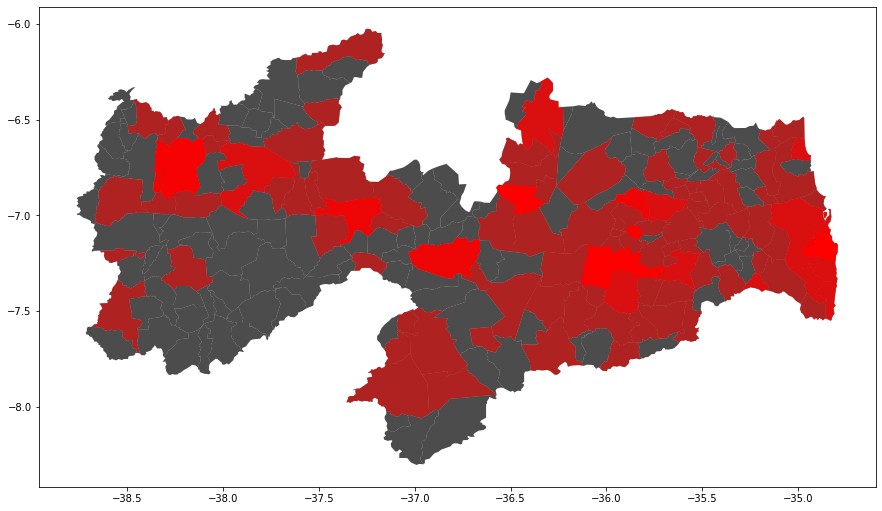

In [26]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha=0.7, color='black')
im = a.plot(ax=ax, alpha=0.55, color='red')

plt.show()

In [24]:
street_map.head()

,OBJECTID,GEOCODIG_M,UF,Sigla,Nome_Munic,Região,Mesorregiã,Nome_Meso,Microrregi,Nome_Micro,Shape_Leng,Shape_Area,geometry
0,1,2500106.0,25,PB,Água Branca,Nordeste,2501,Sertão Paraibano,25007,Serra do Teixeira,0.729661,0.019337,POLYGON ((-37.70375999999851 -7.37317999999868...
1,2,2500205.0,25,PB,Aguiar,Nordeste,2501,Sertão Paraibano,25005,Piancó,0.969734,0.028152,POLYGON ((-38.20503999999892 -7.00980999999774...
2,3,2500304.0,25,PB,Alagoa Grande,Nordeste,2503,Agreste Paraibano,25015,Brejo Paraibano,0.789787,0.026308,POLYGON ((-35.53464999999778 -7.00936999999794...
3,4,2500403.0,25,PB,Alagoa Nova,Nordeste,2503,Agreste Paraibano,25015,Brejo Paraibano,0.500304,0.009923,POLYGON ((-35.79565999999795 -7.02332999999816...
4,5,2500502.0,25,PB,Alagoinha,Nordeste,2503,Agreste Paraibano,25016,Guarabira,0.444048,0.007825,POLYGON ((-35.56344999999783 -6.90759999999863...
